In [2]:
#Using machine learning approaches to understand element patterns in a meteorite 620x803 potassium is 5

i) What elements are associated in chondrite itself, as well in the chondrules, CAIs, and matrix?

ii) Can we predict an element (here K - which is heat producing and thus really important) based on the other elements around?

# clustering analysis

Step 1:Load all the images (loop), as an array using numpy.

In [2]:
import matplotlib.pyplot as plt

In [4]:
import numpy as np
import cv2
import os

instances = []

# Load in the images
for filepath in os.listdir('Meteorides'):
    instances.append(cv2.imread('Meteorides/{0}'.format(filepath),1))

print(type(instances[0]))

<class 'numpy.ndarray'>


In [5]:
for i in range(len(instances)):
    cv2.imshow('image',instances[i])
    cv2.waitKey(0)
    cv2.destroyAllWindows()

Step 2. Use a clustering approach (KMeans or MeanShift) to determine the natural groupings within the dataset, and plot these on element pairplots using seaborn to show which elements dominate the clustering.

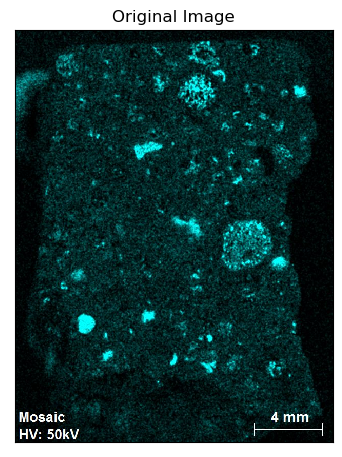

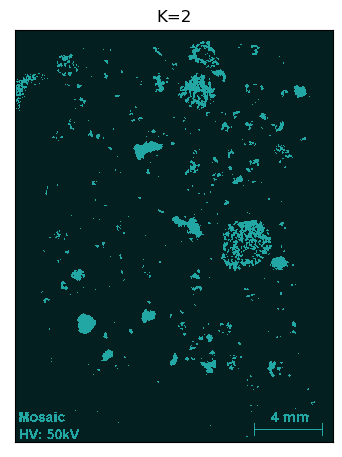

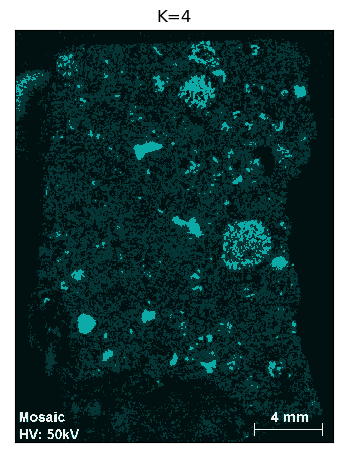

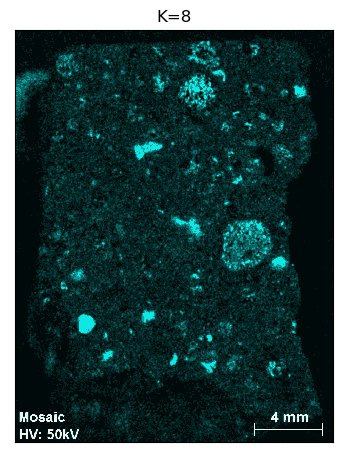

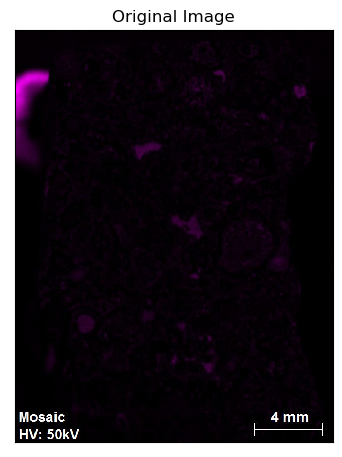

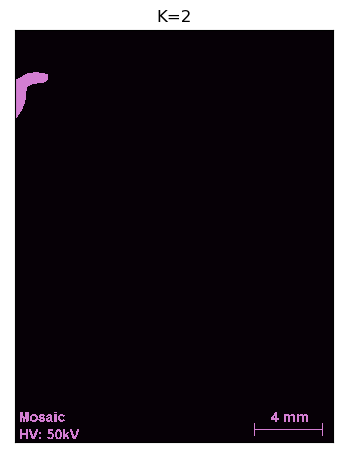

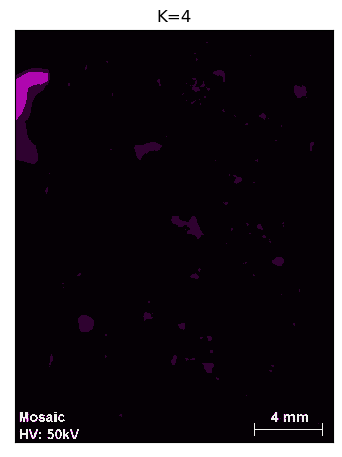

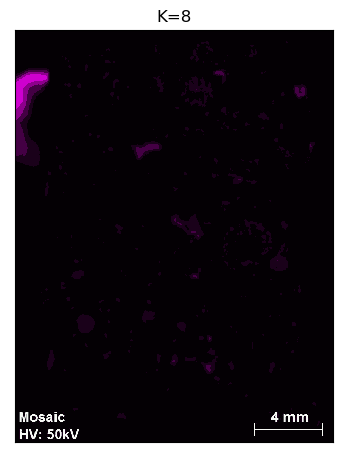

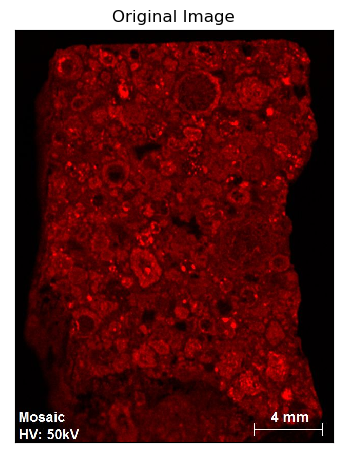

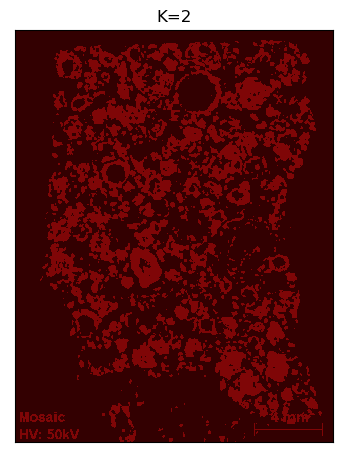

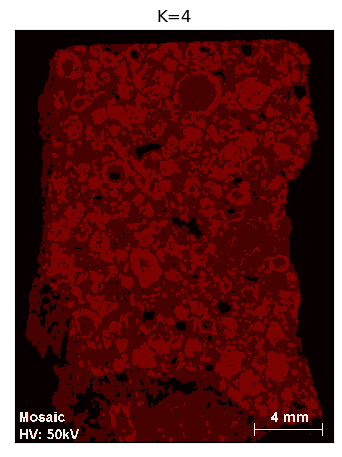

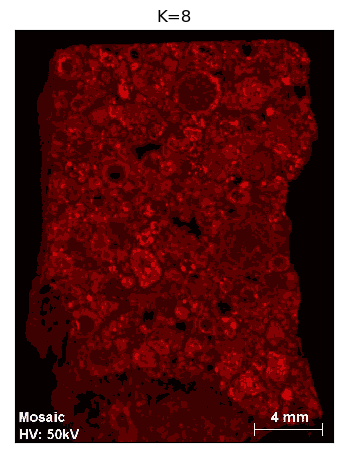

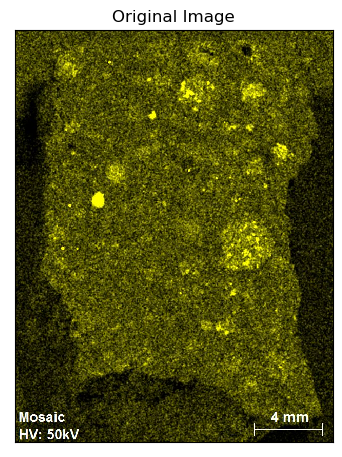

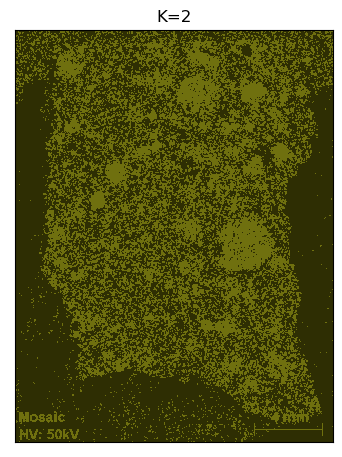

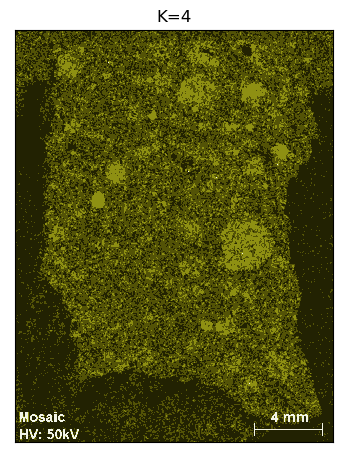

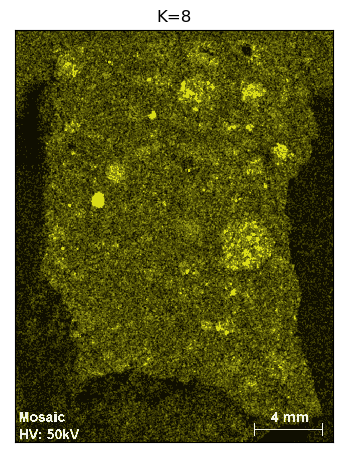

KeyboardInterrupt: 

In [6]:
def main():
    for i in range(len(instances)):
        img = instances[i]
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        Z = img.reshape((-1,3))
        Z = np.float32(Z)

        criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

        K=2
        ret, label1, center1 = cv2.kmeans(Z, K, None,
                                          criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
        center1 = np.uint8(center1)
        res1 = center1[label1.flatten()]
        output1 = res1.reshape((img.shape))

        K=4
        ret, label1, center1 = cv2.kmeans(Z, K, None,
                                          criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
        center1 = np.uint8(center1)
        res1 = center1[label1.flatten()]
        output2 = res1.reshape((img.shape))

        K=8
        ret, label1, center1 = cv2.kmeans(Z, K, None,
                                          criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
        center1 = np.uint8(center1)
        res1 = center1[label1.flatten()]
        output3 = res1.reshape((img.shape))

        output = [img, output1, output2, output3]
        titles = ['Original Image', 'K=2', 'K=4', 'K=8']

        for i in range(4):
            plt.figure(figsize=(16,12), dpi= 100, facecolor='w', edgecolor='k')
            plt.subplot(2, 2, i+1)
            plt.imshow(output[i])
            plt.title(titles[i])
            plt.xticks([])
            plt.yticks([])
        plt.show()

if __name__ == "__main__":
    main()

Use a random forest algorithm to predict potassium in these images. For instance, take a smaller subset of the image array (say 100x100 pixels) as training data, and the rest of the image as test data. The potassium array is what we want to predict. Tune your algorithm (size of training data, training parameters, etc). Create a "predicted" potassium map, and compare to the real. Constrain how well the predicted K map did, and create a histogram of 'feature importances'.

In [7]:
#ROI of test case
img=instances[5] #potassium
roi= img[200:300,300:400] #100x100 pixels
cv2.imshow('image',roi)
cv2.waitKey(0)
cv2.destroyAllWindows()